In [2]:
# import tensorflow as tf

from tensorflow.keras.models import load_model

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
image_data = pd.read_csv('data/fer2013.csv')
testing_data = image_data[image_data.Usage == 'PrivateTest']

In [5]:
emotion_map = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
testing_data['emotioncat'] = testing_data.emotion.map(emotion_map)

testing_data = testing_data[testing_data.emotioncat!='Disgust']

emotion_map = {0:0, 2:2, 3:3, 4:4, 5:5, 6:1}
testing_data['emotion'] = testing_data.emotion.map(emotion_map)

x_test = testing_data.pixels.apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(48,48,1))
x_test = np.stack(x_test.values)
x_test = x_test/255

y_test = np.array(testing_data.emotion)
y_true = y_test

C:\Users\Owner\AppData\Local\Temp\ipykernel_4132\2155787355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['emotioncat'] = testing_data.emotion.map(emotion_map)
C:\Users\Owner\AppData\Local\Temp\ipykernel_4132\2155787355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['emotion'] = testing_data.emotion.map(emotion_map)


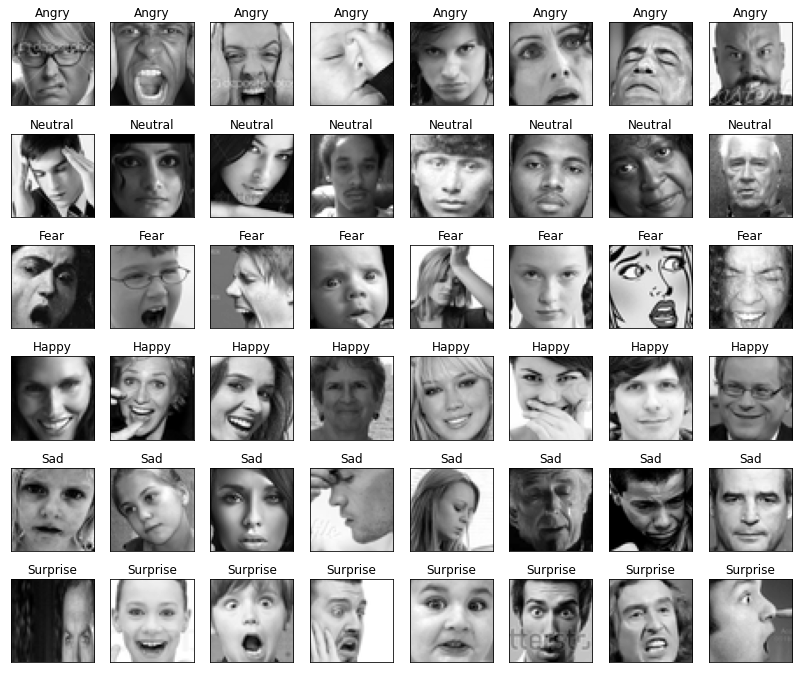

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

emotion_names = {0:'Angry', 1:'Neutral', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise'}


plt.figure(1,(14,14))

position = 1
for emotion in sorted(testing_data.emotion.unique()):
    emotion_data = testing_data[testing_data.emotion==emotion].iloc[0:8,:]
    for j in range(8):
        img = np.fromstring(emotion_data.pixels.iloc[j],dtype=int, sep=' ').reshape(48,48)
        ax = plt.subplot(7,8,position)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_names[emotion])
        ax.imshow(img, cmap='gray')
        position+=1

In [15]:
def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    ax = sns.heatmap(cm, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    # emotion_map = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
    ax.xaxis.set_ticklabels(['Angry','Neutral','Fear','Happy','Sad','Surprise'])
    ax.yaxis.set_ticklabels(['Angry','Neutral','Fear','Happy','Sad','Surprise'])
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [16]:
def check_model(model_path, x_test, y_test):

    emotion_classifier = load_model(model_path, compile=False)
    preds = emotion_classifier.predict(x_test)
    y_pred = np.argmax(preds,-1)


    print(accuracy_score(y_test, y_pred))          
    my_plot_confusion(y_test, y_pred)

In [20]:
m1_path = 'models/m1_40p.h5'
m2_path = 'models/m2_45p.h5'
m3_path = 'models/m3_52p.h5'
m4_path = 'models/m4_53p.h5'
m5_path = 'models/m5_47p.h5'
m6_path = 'models/m6_51p.h5'
m7_path = 'models/m7_53p.h5'
m8_path = 'models/m8_54p.h5'
m9_path = 'models/m9_54p.h5'
m10_path = 'models/m10_59p.h5'
m11_path = 'models/m11_56p.h5'
m12_path = 'models/m12_59p.h5'
m13_path = 'models/m13_59p.h5'
m14_path = 'models/m14_45p.h5'
m15_path = 'models/m15_58p.h5'
m16_path = 'models/m16_59p.h5'
m17_path = 'models/m17_59p.h5'
m18_path = 'models/m18_58p.h5'
mfer2013_path = 'models/fer2013_cnn2.h5'

0.4111488398415393


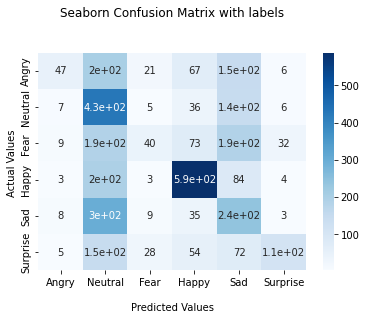

In [19]:
check_model(m1_path,x_test,y_test)

0.4173740803621958


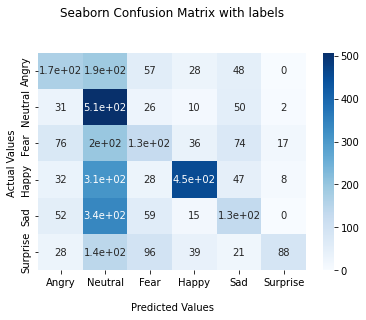

In [23]:
check_model(m2_path,x_test,y_test)

0.4926428975664969


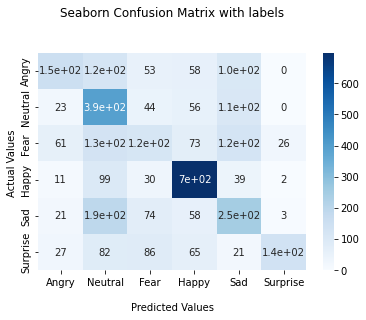

In [24]:
check_model(m3_path,x_test,y_test)

0.5169779286926995


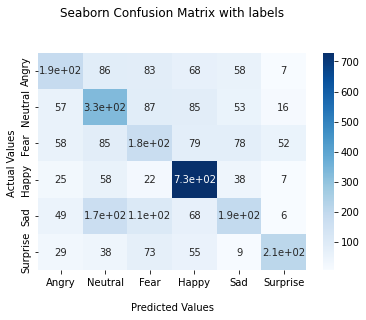

In [25]:
check_model(m4_path,x_test,y_test)

0.4634974533106961


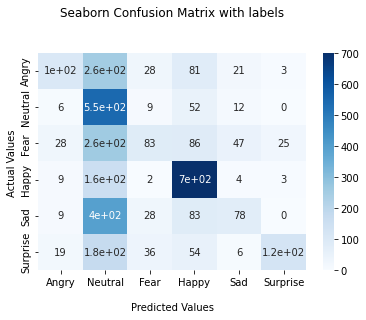

In [26]:
check_model(m5_path,x_test,y_test)

0.4833050367855122


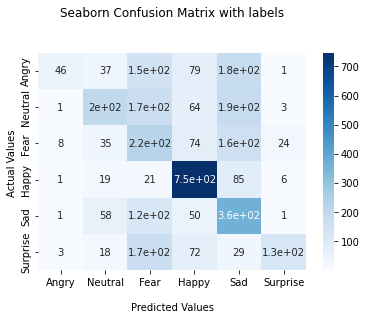

In [27]:
check_model(m6_path,x_test,y_test)

0.5158460667798529


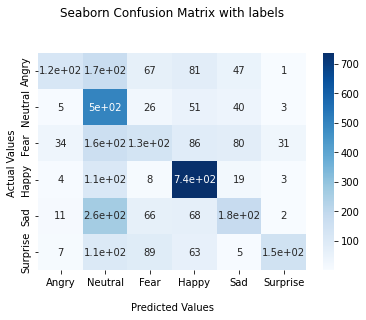

In [28]:
check_model(m7_path,x_test,y_test)

0.5260328239954726


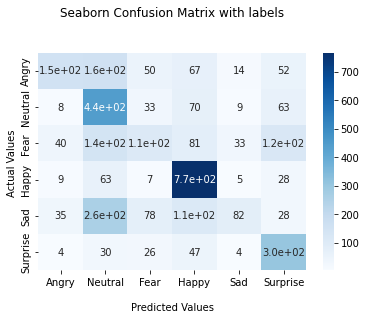

In [29]:
check_model(m8_path,x_test,y_test)

0.478494623655914


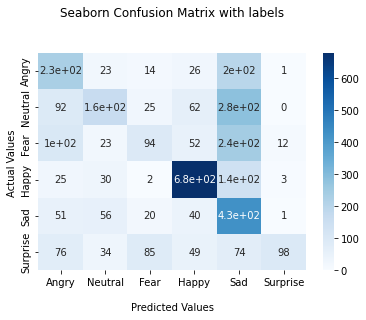

In [30]:
check_model(m9_path,x_test,y_test)

0.5591397849462365


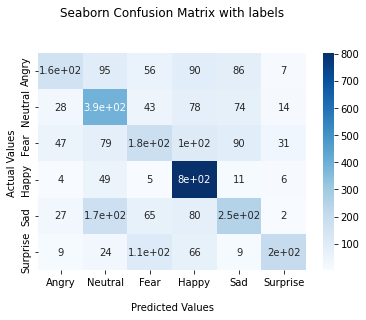

In [31]:
check_model(m10_path,x_test,y_test)

0.5526315789473685


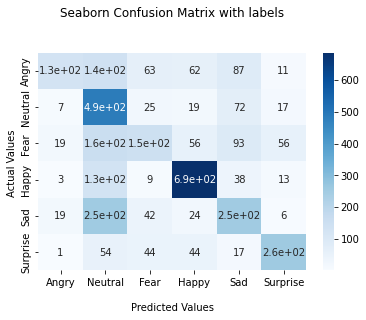

In [32]:
check_model(m11_path,x_test,y_test)

0.5752688172043011


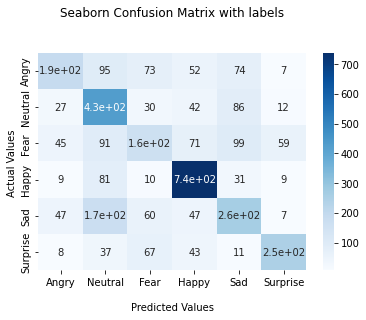

In [33]:
check_model(m12_path,x_test,y_test)

0.6078098471986417


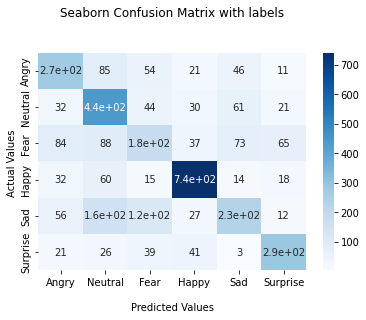

In [34]:
check_model(m13_path,x_test,y_test)

0.43152235427277874


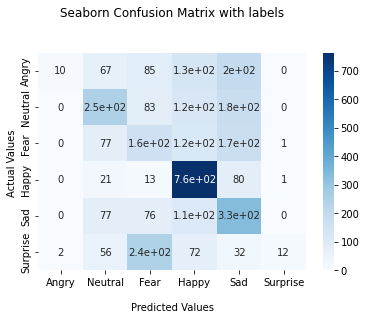

In [35]:
check_model(m14_path,x_test,y_test)

0.5747028862478778


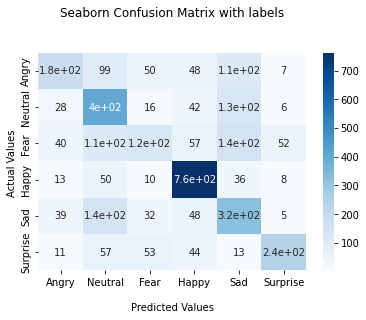

In [36]:
check_model(m15_path,x_test,y_test)

0.576966610073571


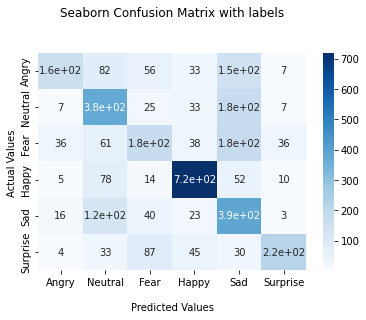

In [37]:
check_model(m16_path,x_test,y_test)

0.5857385398981324


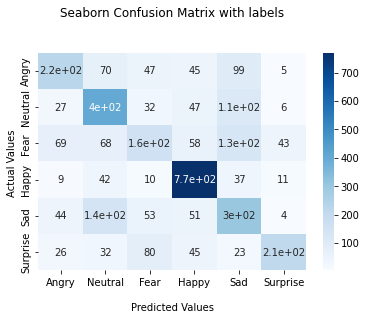

In [38]:
check_model(m17_path,x_test,y_test)

0.5741369552914545


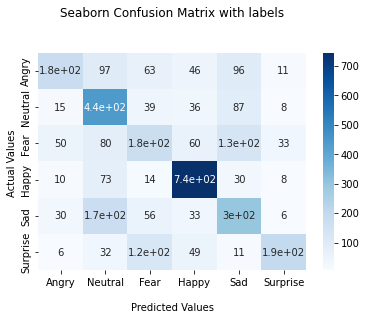

In [39]:
check_model(m18_path,x_test,y_test)

0.5585738539898133


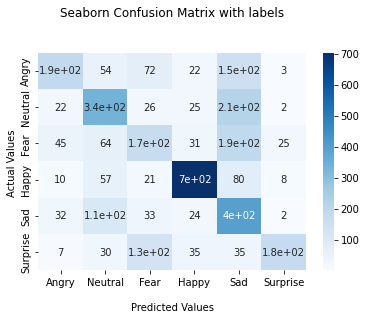

In [40]:
check_model(mfer2013_path,x_test,y_test)